In [1]:
import numpy as np
import json
import topojson
from PIL import Image
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,LineString,Polygon

In [20]:
triFac_path = 'TRI_sector_data/2022_IL_TRI_DATA.csv'
geojson_path = 'TRI_sector_data/Communities-Chicago.geojson'
medinc_pop_path = 'socio_economic_data/income_population_community.csv'
ethnicity_path = 'socio_economic_data/race_data.csv'
tri_sector_gdf = gpd.read_file(triFac_path)


In [3]:
    trifac_df = pd.read_csv(triFac_path)
    trifac_required_cols = ['2. TRIFD', '12. LATITUDE', '13. LONGITUDE','20. INDUSTRY SECTOR']

    trifac_gdf = trifac_df[trifac_required_cols].copy()
    trifac_gdf.columns = ['id','lat', 'long','sector']

    print(trifac_gdf)

                   id        lat       long              sector
0     6206WBNGBN395BI  38.679950 -90.171850           Chemicals
1     60434MBLJLINTER  41.413831 -88.183460           Petroleum
2     61607DDWRD7800S  40.595625 -89.662751  Electric Utilities
3     62206CCDNT500MO  38.600011 -90.169928           Chemicals
4     62201TRDWS7MOBI  38.598032 -90.180633     Hazardous Waste
...               ...        ...        ...                 ...
3606  60064THGLL3500W  42.331752 -87.878972           Chemicals
3607  60064THGLL3500W  42.331752 -87.878972           Chemicals
3608  60443CHRDW21901  41.493552 -87.747176           Chemicals
3609  60473MCWHR192W1  41.614283 -87.621816           Chemicals
3610  60473MCWHR192W1  41.614283 -87.621816           Chemicals

[3611 rows x 4 columns]


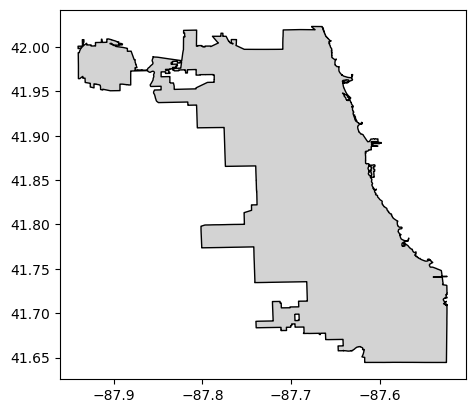

In [4]:
with open(geojson_path, 'r') as f:
    communities_geojson = json.load(f)

communities_gdf = gpd.read_file(geojson_path)
communities_gdf.crs = "EPSG:4326"


chicago_gdf = communities_gdf.unary_union
chicago_gdf = gpd.GeoDataFrame(geometry=[chicago_gdf],crs="EPSG:4326")

fig, ax = plt.subplots()
chicago_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=1)
ax.set_aspect('equal')
plt.show()

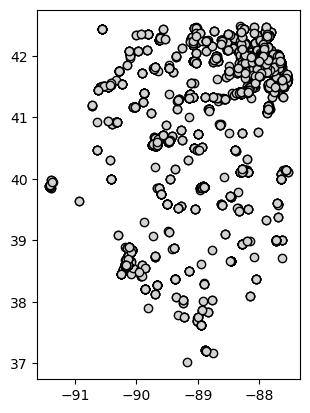

In [5]:
    trifac_df = pd.read_csv(triFac_path)
    trifac_required_cols = ['2. TRIFD', '12. LATITUDE', '13. LONGITUDE','20. INDUSTRY SECTOR']

    trifac_gdf = trifac_df[trifac_required_cols].copy()
    trifac_gdf.columns = ['id','lat', 'long','sector']

    points = [Point(xy) for xy in zip(trifac_gdf['long'],trifac_gdf['lat'])] 
    trifac_gdf = gpd.GeoDataFrame(trifac_gdf,geometry=points, crs="EPSG:4326")

    fig, ax = plt.subplots()
    trifac_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=1)
    ax.set_aspect('equal')
    plt.show()

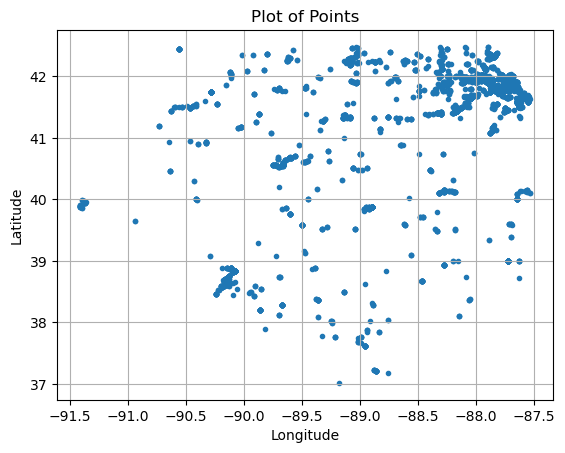

In [6]:
# Plotting all points
plt.scatter(trifac_gdf['long'], trifac_gdf['lat'], marker='.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of Points')
plt.grid(True)
plt.show()

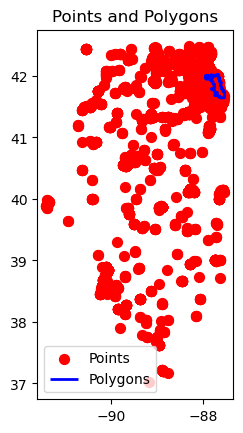

In [7]:
# Plotting points
ax = trifac_gdf.plot(marker='o', color='red', markersize=50, label='Points')

# Plotting polygons
chicago_gdf.boundary.plot(ax=ax, color=None, edgecolor='blue', linewidth=2, label='Polygons')

# Customize the plot as needed
plt.title('Points and Polygons')
plt.legend()
plt.show()

In [8]:
inChicagoTrifac_gdf = gpd.sjoin(trifac_gdf, chicago_gdf,op='within')
inChicagoTrifac_gdf = inChicagoTrifac_gdf.drop_duplicates(subset='id', keep='first').drop(columns=['index_right'])
print(inChicagoTrifac_gdf)

                   id        lat       long  \
13    6061WGSSLN18WFU  41.887079 -87.672943   
14    6062WGLBLM2825W  41.836840 -87.696190   
27    60623CHCGS1846S  41.855126 -87.737691   
33    60609MNLYL4435S  41.810058 -87.681026   
35    60651LLDMT4528W  41.903133 -87.739426   
...               ...        ...        ...   
2434  60614WSTRN3636N  41.947530 -87.740550   
2973  60618SWTCH5555N  41.982118 -87.762359   
3156  60622NVRSL1523W  41.889582 -87.666362   
3259  60609CLNRY4201S  41.817670 -87.663604   
3572  6061WSPHLT2835E  41.702740 -87.555133   

                                 sector                    geometry  
13                            Beverages  POINT (-87.67294 41.88708)  
14          Nonmetallic Mineral Product  POINT (-87.69619 41.83684)  
27                    Fabricated Metals  POINT (-87.73769 41.85513)  
33                 Electrical Equipment  POINT (-87.68103 41.81006)  
35                       Primary Metals  POINT (-87.73943 41.90313)  
...            

C:\Users\SIDDHANT\anaconda3\envs\jupyterPreProcess\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


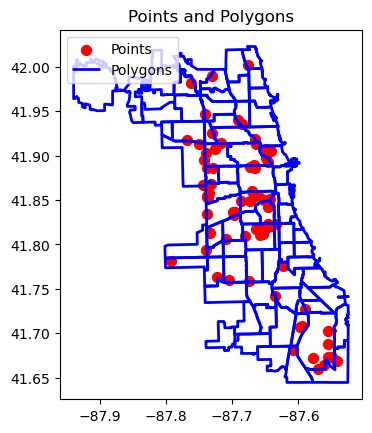

In [9]:
# Plotting points
ax = inChicagoTrifac_gdf.plot(marker='o', color='red', markersize=50, label='Points')

# Plotting polygons
communities_gdf.boundary.plot(ax=ax, color=None, edgecolor='blue', linewidth=2, label='Polygons')

# Customize the plot as needed
plt.title('Points and Polygons')
plt.legend()
plt.show()

In [10]:
unique_sectors = inChicagoTrifac_gdf['sector'].unique()
print(unique_sectors)

#FIND THE MIN MAX X Y BOUNDS OF CHICAGO
# Get the bounds of the polygon
bounds = chicago_gdf.total_bounds

# Extract the min and max values
min_longitude, min_latitude, max_longitude, max_latitude = bounds

# Output the results
print("Minimum Longitude:", min_longitude)
print("Maximum Longitude:", max_longitude)
print("Minimum Latitude:", min_latitude)
print("Maximum Latitude:", max_latitude)

['Beverages' 'Nonmetallic Mineral Product' 'Fabricated Metals'
 'Electrical Equipment' 'Primary Metals' 'Paper' 'Chemical Wholesalers'
 'Transportation Equipment' 'Chemicals' 'Plastics and Rubber' 'Food'
 'Hazardous Waste' 'Petroleum' 'Miscellaneous Manufacturing'
 'Computers and Electronic Products' 'Petroleum Bulk Terminals']
Minimum Longitude: -87.9401140825235
Maximum Longitude: -87.52413710389523
Minimum Latitude: 41.644543121506054
Maximum Latitude: 42.023038586147585


In [11]:
#EXPORT THE TRI CSV DATA TO CSV
#inChicagoTrifac_gdf = inChicagoTrifac_gdf.drop(columns=['geometry'])
inChicagoTrifac_gdf.to_csv('inChicagoTrifac_gdf.csv', index=False)


In [12]:
#FIND THE TRI COUNT PER COMMUNITY
joined = gpd.sjoin(inChicagoTrifac_gdf, communities_gdf, how="inner", op='within')
point_count_per_polygon = joined.groupby('area_num_1').size().reset_index(name='point_count')
print(point_count_per_polygon)

total_count = point_count_per_polygon['point_count'].sum()
print("The sum of all count values is:", total_count)

tri_count_gdf = communities_gdf.merge(point_count_per_polygon, on='area_num_1', how='left')
tri_count_gdf['point_count'].fillna(0, inplace=True)


total_count = tri_count_gdf['point_count'].sum()
print("The sum of all count values is:", total_count)

tri_count_gdf = tri_count_gdf[['area_num_1', 'community', 'geometry', 'point_count']]
tri_count_gdf['centroid'] = tri_count_gdf['geometry'].centroid
tri_count_gdf['lat'] = tri_count_gdf['centroid'].y
tri_count_gdf['long'] = tri_count_gdf['centroid'].x

tri_count_gdf.drop(columns=['geometry', 'centroid','community'], inplace=True)
print(tri_count_gdf)
#tri_pop_inc_gdf['count'].fillna(0, inplace=True)
#tri_pop_inc_gdf.rename(columns={'count': 'tri_count'}, inplace=True)
#print(tri_pop_inc_gdf)

   area_num_1  point_count
0           1            1
1          11            1
2          13            1
3          16            1
4          19            1
5          20            1
6          22            2
7          23            2
8          24            4
9          25            3
10         26            2
11         28            4
12         29            5
13         30            4
14         31            5
15         37            1
16         47            1
17          5            2
18         50            2
19         51            7
20         54            1
21         55            1
22         56            1
23         57            1
24         58            1
25         60            1
26         61           10
27         64            1
28         65            1
29         66            1
30         67            1
31         69            1
32         71            1
33          8            2
The sum of all count values is: 74
The sum of all count

C:\Users\SIDDHANT\anaconda3\envs\jupyterPreProcess\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\SIDDHANT\AppData\Local\Temp\ipykernel_25936\357918930.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tri_count_gdf['centroid'] = tri_count_gdf['geometry'].centroid


In [13]:
tri_datashader_df = tri_count_gdf.copy()
# Repeat rows based on point_count
tri_datashader_df = tri_datashader_df.reindex(tri_datashader_df.index.repeat(tri_datashader_df['point_count'].astype(int)))

# Reset index of the new DataFrame
tri_datashader_df.drop(columns=['point_count', 'area_num_1'], inplace=True)
tri_datashader_df.reset_index(drop=True, inplace=True)
tri_datashader_df['class'] = 'class_tri'
# Display the new DataFrame
print(tri_datashader_df)
tri_datashader_df.to_csv('tri_datashader.csv', index=False)

          lat       long      class
0   41.809085 -87.632425  class_tri
1   42.009623 -87.670167  class_tri
2   41.978830 -87.771167  class_tri
3   41.983636 -87.723583  class_tri
4   41.953582 -87.723452  class_tri
..        ...        ...        ...
69  41.769779 -87.726929  class_tri
70  41.771849 -87.695666  class_tri
71  41.775930 -87.666596  class_tri
72  41.763247 -87.616134  class_tri
73  41.744205 -87.656307  class_tri

[74 rows x 3 columns]


In [27]:
#calculate the ethnicity community gdf 


ethnicity_cols = ['area_num_1', 'geometry']

ethnicity_communities_gdf = communities_gdf[ethnicity_cols].copy()
ethnicity_communities_gdf.columns = ['geoid','geometry']
ethnicity_communities_gdf['centroid'] = ethnicity_communities_gdf['geometry'].centroid
ethnicity_communities_gdf['lat'] = ethnicity_communities_gdf['centroid'].y
ethnicity_communities_gdf['long'] = ethnicity_communities_gdf['centroid'].x

ethnicity_communities_gdf.drop(columns=['geometry', 'centroid'], inplace=True)
print(ethnicity_communities_gdf);


   geoid        lat       long
0     35  41.835118 -87.618678
1     36  41.823750 -87.603216
2     37  41.809085 -87.632425
3     38  41.812949 -87.617860
4     39  41.808916 -87.596184
..   ...        ...        ...
72    74  41.694879 -87.713192
73    75  41.689730 -87.669054
74    76  41.975684 -87.893701
75    77  41.986712 -87.663417
76     9  42.007613 -87.813781

[77 rows x 3 columns]


C:\Users\SIDDHANT\AppData\Local\Temp\ipykernel_25936\3434497284.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ethnicity_communities_gdf['centroid'] = ethnicity_communities_gdf['geometry'].centroid


In [38]:
#get the ethnicity values 
ethnicity_df = pd.read_csv(ethnicity_path)
print(ethnicity_df)

    area_num  white  hispanic  black  asian  other
0          1     25        11     15      3      3
1          2     32        18      9     17      4
2          3     31         9     11      6      2
3          4     26         8      2      4      2
4          5     27         5      1      2      2
..       ...    ...       ...    ...    ...    ...
72        73      0         0     26      0      0
73        74     16         2      0      0      1
74        75      7         1     13      0      1
75        76      9         1      1      2      0
76        77     32         9      7      7      3

[77 rows x 6 columns]


In [39]:
ethnicity_communities_gdf['geoid'] = ethnicity_communities_gdf['geoid'].astype('int64')

print(ethnicity_df.dtypes)
print(ethnicity_communities_gdf.dtypes)
ethnicity_df = pd.merge(ethnicity_df, ethnicity_communities_gdf, left_on='area_num', right_on='geoid', how='left')
ethnicity_df.drop(columns=['area_num'], inplace=True)
print(ethnicity_df)

area_num    int64
white       int64
hispanic    int64
black       int64
asian       int64
other       int64
dtype: object
geoid      int64
lat      float64
long     float64
dtype: object
    white  hispanic  black  asian  other  geoid        lat       long
0      25        11     15      3      3      1  42.009623 -87.670167
1      32        18      9     17      4      2  42.001572 -87.695013
2      31         9     11      6      2      3  41.965812 -87.655879
3      26         8      2      4      2      4  41.975172 -87.687515
4      27         5      1      2      2      5  41.947792 -87.683835
..    ...       ...    ...    ...    ...    ...        ...        ...
72      0         0     26      0      0     73  41.717494 -87.648895
73     16         2      0      0      1     74  41.694879 -87.713192
74      7         1     13      0      1     75  41.689730 -87.669054
75      9         1      1      2      0     76  41.975684 -87.893701
76     32         9      7      7      3   

In [45]:
#generate the datashader csv file 


# Initialize an empty list to store rows
rows = []

# Iterate through each row in the dataframe
for index, row in ethnicity_df.iterrows():
    # Iterate through each race column
    for race in ['white', 'hispanic', 'black', 'asian', 'other']:
        # Repeat the lat long based on the count of each race
        for _ in range(int(row[race])):
            # Append a new row with lat long and race
            rows.append([row['lat'], row['long'], race])

# Create a new dataframe from the list of rows
result_df = pd.DataFrame(rows, columns=['lat', 'long', 'race'])

# Display the resulting dataframe
print(result_df)
result_df.to_csv('race_datashader.csv', index=False)


            lat       long   race
0     42.009623 -87.670167  white
1     42.009623 -87.670167  white
2     42.009623 -87.670167  white
3     42.009623 -87.670167  white
4     42.009623 -87.670167  white
...         ...        ...    ...
2744  41.986712 -87.663417  asian
2745  41.986712 -87.663417  asian
2746  41.986712 -87.663417  other
2747  41.986712 -87.663417  other
2748  41.986712 -87.663417  other

[2749 rows x 3 columns]


tri min: 0.0 max: 10.0
point count normalized sum: 740


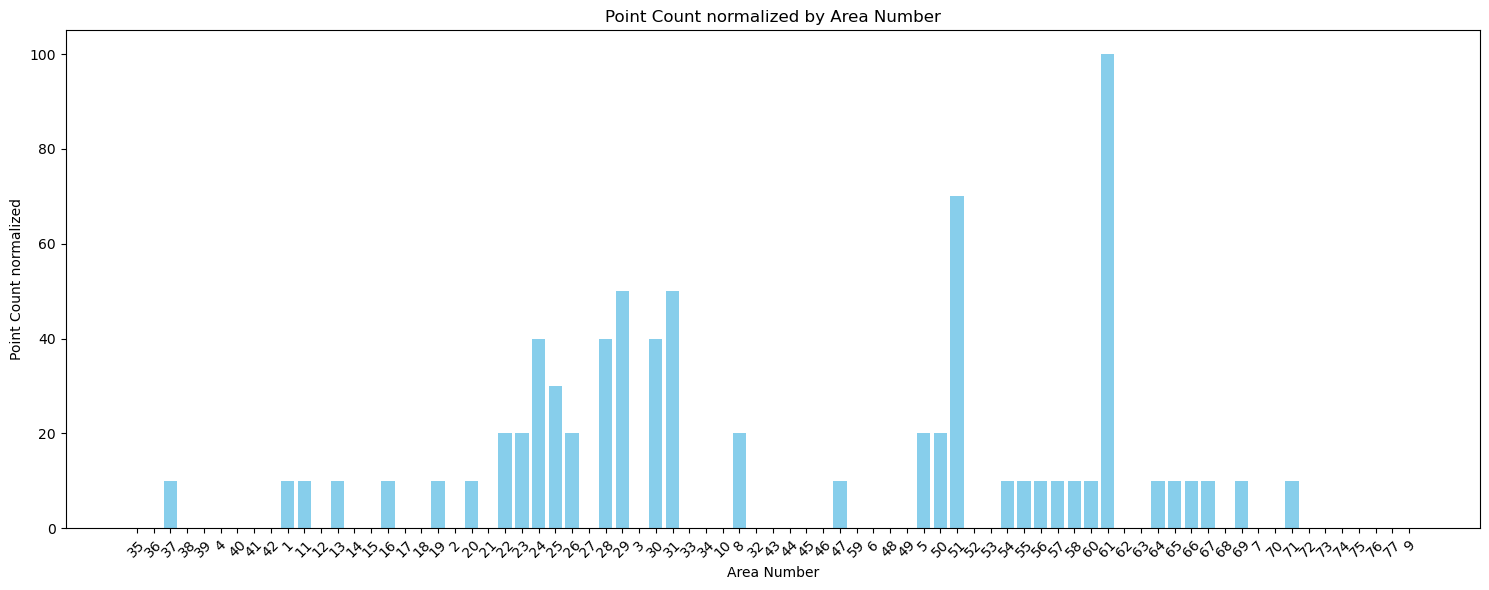

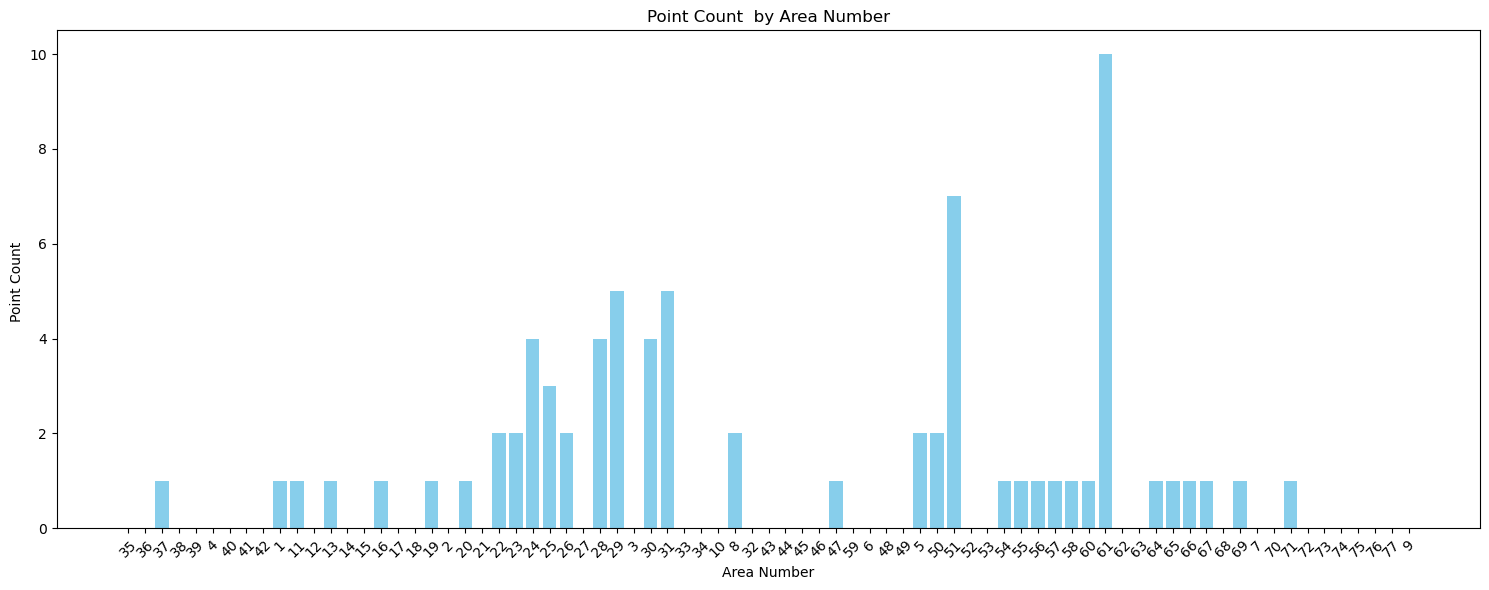

In [14]:
#CALCULATE THE NORMALIZED VALUES 
tri_count_norm_gdf = tri_count_gdf.copy()

# Min-Max normalization
min_value = tri_count_norm_gdf['point_count'].min()
max_value = tri_count_norm_gdf['point_count'].max()
print("tri min:",min_value,"max:",max_value);
tri_count_norm_gdf['point_count_normalized'] = (((tri_count_norm_gdf['point_count'] - min_value) / (max_value - min_value)) * 100).round(0).astype(int)

print("point count normalized sum:",tri_count_norm_gdf['point_count_normalized'].sum());
plt.figure(figsize=(15, 6))
plt.bar(tri_count_norm_gdf['area_num_1'], tri_count_norm_gdf['point_count_normalized'], color='skyblue')
plt.xlabel('Area Number')
plt.ylabel('Point Count normalized')
plt.title('Point Count normalized by Area Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(tri_count_norm_gdf['area_num_1'], tri_count_norm_gdf['point_count'], color='skyblue')
plt.xlabel('Area Number')
plt.ylabel('Point Count ')
plt.title('Point Count  by Area Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
tri_datashader_df = tri_count_gdf.copy()
# Repeat rows based on point_count
tri_datashader_df = tri_datashader_df.reindex(tri_datashader_df.index.repeat(tri_datashader_df['point_count'].astype(int)))

# Reset index of the new DataFrame
tri_datashader_df.drop(columns=['point_count', 'area_num_1'], inplace=True)
tri_datashader_df.reset_index(drop=True, inplace=True)
tri_datashader_df['class'] = 'class_tri'
# Display the new DataFrame
print(tri_datashader_df)
tri_datashader_df.to_csv('tri_datashader.csv', index=False)

          lat       long      class
0   41.809085 -87.632425  class_tri
1   42.009623 -87.670167  class_tri
2   41.978830 -87.771167  class_tri
3   41.983636 -87.723583  class_tri
4   41.953582 -87.723452  class_tri
..        ...        ...        ...
69  41.769779 -87.726929  class_tri
70  41.771849 -87.695666  class_tri
71  41.775930 -87.666596  class_tri
72  41.763247 -87.616134  class_tri
73  41.744205 -87.656307  class_tri

[74 rows x 3 columns]


In [16]:
#NORMALIZED DATASHADER
tri_norm_datashader_df = tri_count_norm_gdf.copy()
# Repeat rows based on point_count
tri_norm_datashader_df = tri_norm_datashader_df.reindex(tri_norm_datashader_df.index.repeat(tri_norm_datashader_df['point_count_normalized'].astype(int)))

# Reset index of the new DataFrame
tri_norm_datashader_df.drop(columns=['point_count_normalized','point_count', 'area_num_1'], inplace=True)
tri_norm_datashader_df.reset_index(drop=True, inplace=True)
tri_norm_datashader_df['class'] = 'class_tri'
# Display the new DataFrame
print(tri_norm_datashader_df)
tri_norm_datashader_df.to_csv('tri_norm_datashader.csv', index=False)

           lat       long      class
0    41.809085 -87.632425  class_tri
1    41.809085 -87.632425  class_tri
2    41.809085 -87.632425  class_tri
3    41.809085 -87.632425  class_tri
4    41.809085 -87.632425  class_tri
..         ...        ...        ...
735  41.744205 -87.656307  class_tri
736  41.744205 -87.656307  class_tri
737  41.744205 -87.656307  class_tri
738  41.744205 -87.656307  class_tri
739  41.744205 -87.656307  class_tri

[740 rows x 3 columns]


In [17]:
    # Load JSON data from file
    with open('median_income_datashader_cat_1.json', 'r') as file:
        json_data = json.load(file)
    
    # Extract array data from JSON
    array_data = np.array(json_data)

    print("json shape:",array_data.shape)
    # Determine height and width of the image
    height, width = array_data.shape

    
    # Scale the data for better visualization (optional)
    # You may need to adjust this scaling factor based on your data
    scaled_data = array_data * 255
    
    # Convert the data to uint8 for image creation
    image_data = scaled_data.astype(np.uint8)
    
    # Create the image
    img = Image.fromarray(image_data)
    
    # Save the image
    img.save('median_income_datashader_cat_1.png')


FileNotFoundError: [Errno 2] No such file or directory: 'median_income_datashader_cat_1.json'

In [18]:
#READ THE MEDIAN INCOME DATA
median_income_df = pd.read_csv(medinc_pop_path)
median_income_cols = ['GEOID', 'Latitude', 'Longitude','INC_2018-2022']

median_income_df = median_income_df[median_income_cols].copy()
median_income_df.columns = ['geoid','lat', 'long','income']
print(median_income_df)

    geoid        lat       long        income
0       1  42.009630 -87.670171   53437.61017
1      10  41.985248 -87.803451   98470.72342
2      11  41.978836 -87.771165   85018.79568
3      12  41.993938 -87.758358  130092.48570
4      13  41.983651 -87.723578   65645.26518
..    ...        ...        ...           ...
72     75  41.689729 -87.669062   64960.63929
73     76  41.975696 -87.893699   64432.76097
74     77  41.986719 -87.663419   65693.54077
75      8  41.899611 -87.633318  118407.68780
76      9  42.007627 -87.813780  109770.59690

[77 rows x 4 columns]


total_income_sum: 4965698.505180001
income min: 16905.85249 max: 145315.2655


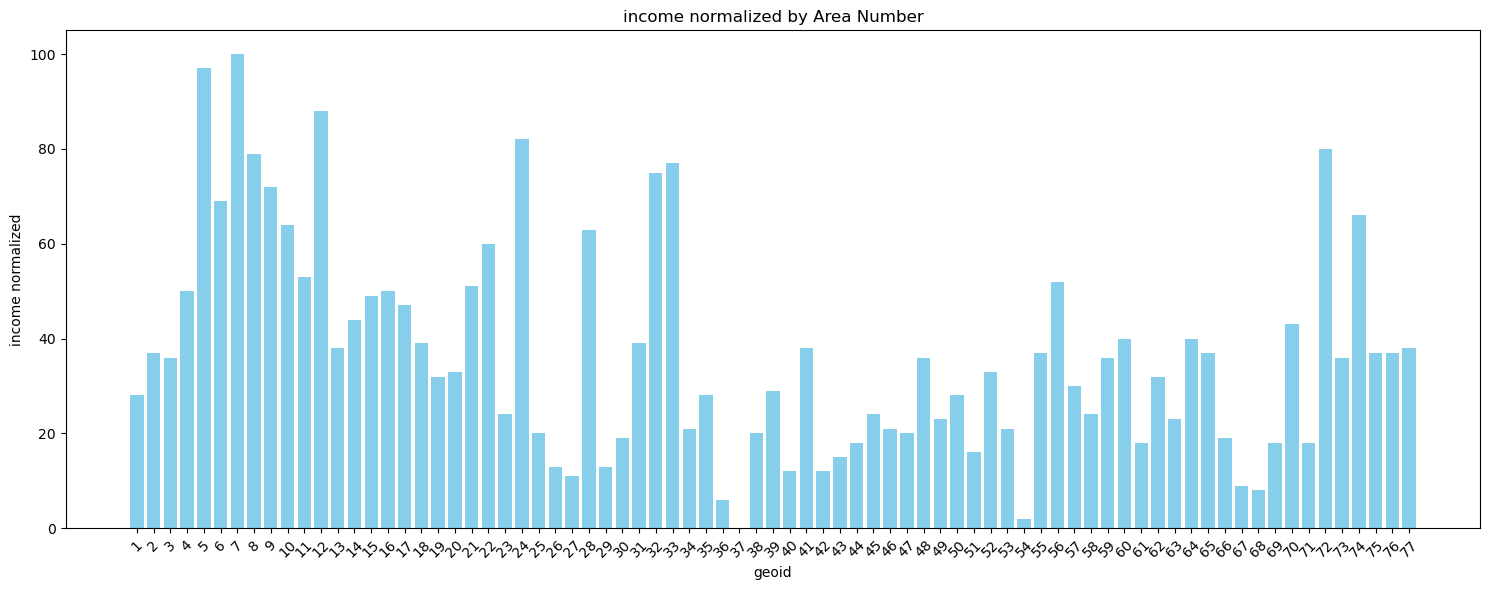

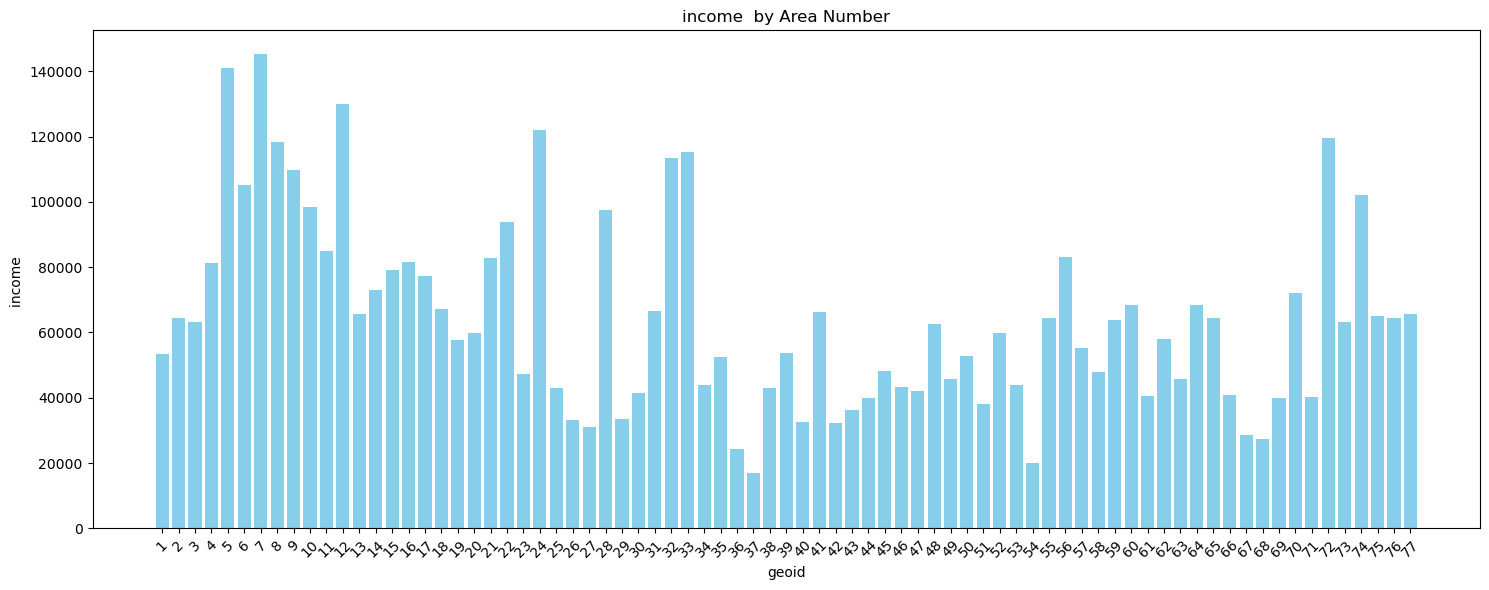

In [20]:
#CALCULATE THE NORMALIZED VALUES 
median_income_norm_df = median_income_df.copy()
# Calculate the total point count sum
total_income_sum = median_income_norm_df['income'].sum()
print("total_income_sum:",total_income_sum)

# Min-Max normalization
min_value = median_income_norm_df['income'].min()
max_value = median_income_norm_df['income'].max()
print("income min:",min_value,"max:",max_value);
median_income_norm_df['income_normalized'] = (((median_income_norm_df['income'] - min_value) / (max_value - min_value)) * 100).round(0).astype(int)

plt.figure(figsize=(15, 6))
plt.bar(median_income_norm_df['geoid'], median_income_norm_df['income_normalized'], color='skyblue')
plt.xlabel('geoid')
plt.ylabel('income normalized')
plt.title('income normalized by Area Number')
plt.xticks(rotation=45)
plt.xticks(ticks=median_income_norm_df['geoid'], labels=median_income_norm_df['geoid'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(median_income_norm_df['geoid'], median_income_norm_df['income'], color='skyblue')
plt.xlabel('geoid')
plt.ylabel('income ')
plt.title('income  by Area Number')
plt.xticks(rotation=45)
plt.xticks(ticks=median_income_norm_df['geoid'], labels=median_income_norm_df['geoid'])
plt.tight_layout()
plt.show()

In [21]:
# Assuming 'median_income_df' is your original DataFrame
# First, create a list of DataFrames, each containing rows repeated according to 'income_rounded'
dfs_to_concat = []
for _, row in median_income_df.iterrows():
    repeated_rows = pd.DataFrame(np.repeat(row[['geoid', 'lat', 'long']].values.reshape(1, -1), row['income'], axis=0),
                                 columns=['geoid', 'lat', 'long'])
    dfs_to_concat.append(repeated_rows)

# Concatenate the list of DataFrames into a single DataFrame
median_income_datashader_df = pd.concat(dfs_to_concat, ignore_index=True)
median_income_datashader_df['class'] = 'class_income'
median_income_datashader_df.to_csv('income_datashader.csv', index=False)

In [22]:
#NORMALIZED MEDIAN INCOME DATASHADER
income_norm_datashader_df = median_income_norm_df.copy()
print(income_norm_datashader_df['income_normalized'].sum())
# Repeat rows based on point_count
income_norm_datashader_df = income_norm_datashader_df.reindex(income_norm_datashader_df.index.repeat(income_norm_datashader_df['income_normalized'].astype(int)))

# Reset index of the new DataFrame
income_norm_datashader_df.drop(columns=['income_normalized','income', 'geoid'], inplace=True)
income_norm_datashader_df.reset_index(drop=True, inplace=True)
income_norm_datashader_df['class'] = 'class_income'
# Display the new DataFrame
print(income_norm_datashader_df)
income_norm_datashader_df.to_csv('income_norm_datashader.csv', index=False)

2853
            lat       long         class
0     42.009630 -87.670171  class_income
1     42.009630 -87.670171  class_income
2     42.009630 -87.670171  class_income
3     42.009630 -87.670171  class_income
4     42.009630 -87.670171  class_income
...         ...        ...           ...
2848  42.007627 -87.813780  class_income
2849  42.007627 -87.813780  class_income
2850  42.007627 -87.813780  class_income
2851  42.007627 -87.813780  class_income
2852  42.007627 -87.813780  class_income

[2853 rows x 3 columns]


In [23]:
#READ THE POPULATION DATA
population_df = pd.read_csv(medinc_pop_path)
population_cols = ['GEOID', 'Latitude', 'Longitude','Population']

population_df = population_df[population_cols].copy()
population_df.columns = ['geoid','lat', 'long','population']
print(population_df)

    geoid        lat       long  population
0       1  42.009630 -87.670171       55454
1      10  41.985248 -87.803451       41069
2      11  41.978836 -87.771165       26201
3      12  41.993938 -87.758358       19579
4      13  41.983651 -87.723578       17522
..    ...        ...        ...         ...
72     75  41.689729 -87.669062       21714
73     76  41.975696 -87.893699       14416
74     77  41.986719 -87.663419       56308
75      8  41.899611 -87.633318       97789
76      9  42.007627 -87.813780       11521

[77 rows x 4 columns]


In [24]:
population_df['population_rounded'] = np.ceil(population_df['population'] / 10000).astype(int)
print(population_df)

    geoid        lat       long  population  population_rounded
0       1  42.009630 -87.670171       55454                   6
1      10  41.985248 -87.803451       41069                   5
2      11  41.978836 -87.771165       26201                   3
3      12  41.993938 -87.758358       19579                   2
4      13  41.983651 -87.723578       17522                   2
..    ...        ...        ...         ...                 ...
72     75  41.689729 -87.669062       21714                   3
73     76  41.975696 -87.893699       14416                   2
74     77  41.986719 -87.663419       56308                   6
75      8  41.899611 -87.633318       97789                  10
76      9  42.007627 -87.813780       11521                   2

[77 rows x 5 columns]


population min: 2514 max: 103048


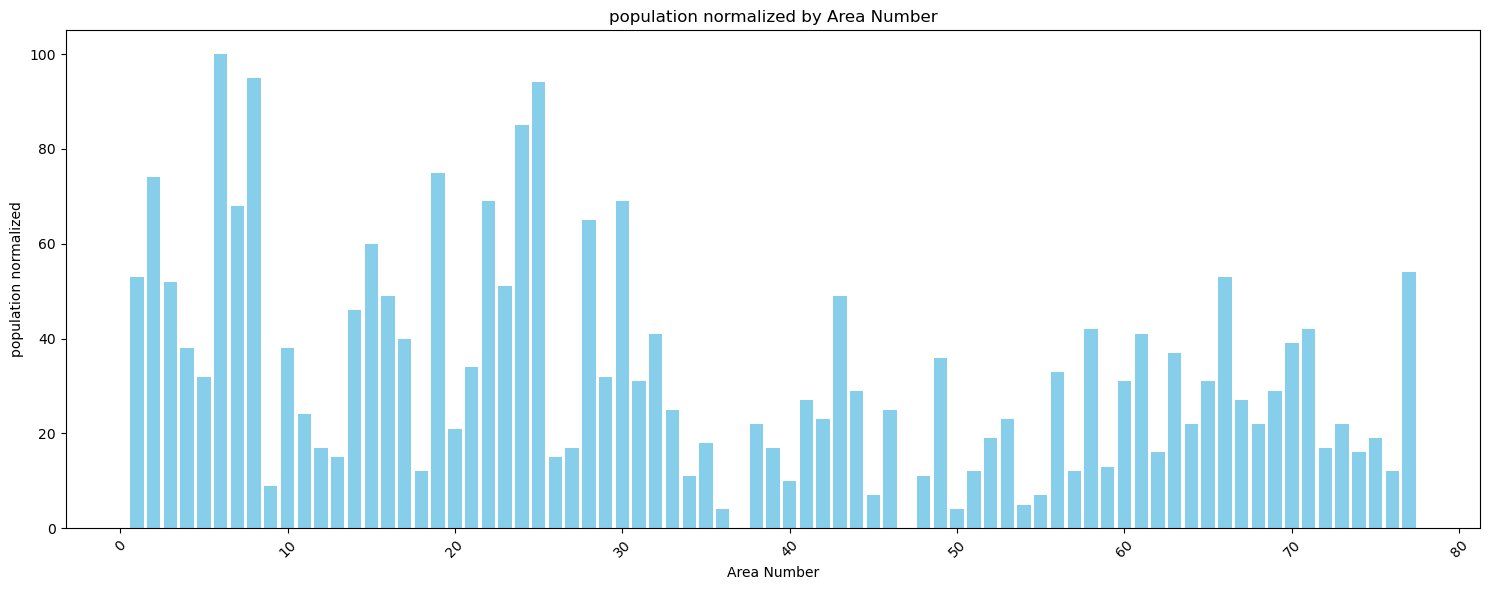

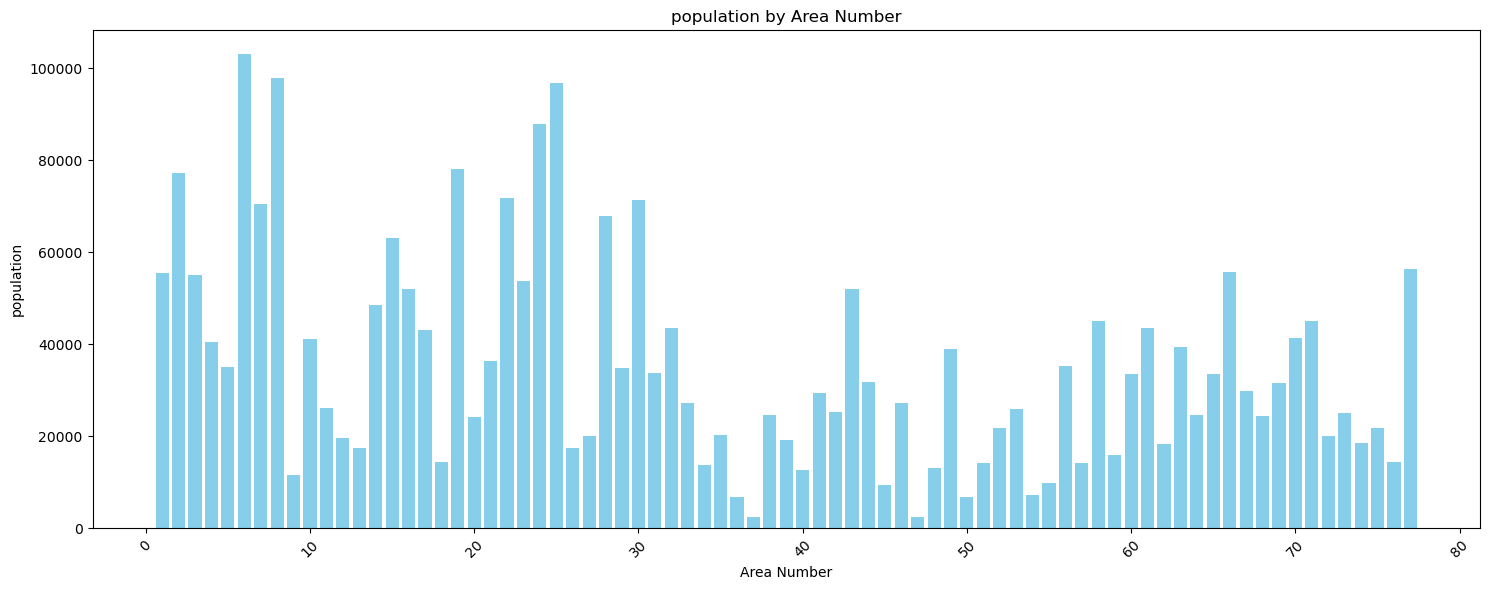

In [25]:
#CALCULATE THE NORMALIZED VALUES 
population_norm_df = population_df.copy()

# Min-Max normalization
min_value = population_norm_df['population'].min()
max_value = population_norm_df['population'].max()
print("population min:",min_value,"max:",max_value);
population_norm_df['population_normalized'] = (((population_norm_df['population'] - min_value) / (max_value - min_value)) * 100).round(0).astype(int)


plt.figure(figsize=(15, 6))
plt.bar(population_norm_df['geoid'], population_norm_df['population_normalized'], color='skyblue')
plt.xlabel('Area Number')
plt.ylabel('population normalized')
plt.title('population normalized by Area Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(population_norm_df['geoid'], population_norm_df['population'], color='skyblue')
plt.xlabel('Area Number')
plt.ylabel('population')
plt.title('population by Area Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
dfs_to_concat = []
for _, row in population_df.iterrows():
    repeated_rows = pd.DataFrame(np.repeat(row[['geoid', 'lat', 'long']].values.reshape(1, -1), row['population_rounded'], axis=0),
                                 columns=['geoid', 'lat', 'long'])
    dfs_to_concat.append(repeated_rows)

# Concatenate the list of DataFrames into a single DataFrame
population_datashader_df = pd.concat(dfs_to_concat, ignore_index=True)
population_datashader_df['class'] = 'class_population'
population_datashader_df.to_csv('population_datashader.csv', index=False)

In [113]:
#NORMALIZED MEDIAN INCOME DATASHADER
population_norm_datashader_df = population_norm_df.copy()
print(population_norm_datashader_df['population_normalized'].sum())
# Repeat rows based on point_count
population_norm_datashader_df = population_norm_datashader_df.reindex(population_norm_datashader_df.index.repeat(population_norm_datashader_df['population_normalized'].astype(int)))

# Reset index of the new DataFrame
population_norm_datashader_df.drop(columns=['population_normalized','population','population_rounded', 'geoid'], inplace=True)
population_norm_datashader_df.reset_index(drop=True, inplace=True)
population_norm_datashader_df['class'] = 'class_population'
# Display the new DataFrame
print(population_norm_datashader_df)
population_norm_datashader_df.to_csv('population_norm_datashader.csv', index=False)

2535
            lat       long             class
0     42.009630 -87.670171  class_population
1     42.009630 -87.670171  class_population
2     42.009630 -87.670171  class_population
3     42.009630 -87.670171  class_population
4     42.009630 -87.670171  class_population
...         ...        ...               ...
2530  42.007627 -87.813780  class_population
2531  42.007627 -87.813780  class_population
2532  42.007627 -87.813780  class_population
2533  42.007627 -87.813780  class_population
2534  42.007627 -87.813780  class_population

[2535 rows x 3 columns]


In [57]:
#combine population and income data
combined_df = pd.concat([population_datashader_df, median_income_datashader_df], ignore_index=True)
combined_df.to_csv('income_population_datashader.csv', index=False)

In [116]:
#combine NORMALIZED population and income data
print(population_norm_datashader_df)
print(income_norm_datashader_df)
combined_norm_df = pd.concat([population_norm_datashader_df, income_norm_datashader_df], ignore_index=True)
combined_norm_df.to_csv('income_population_norm_datashader.csv', index=False)

            lat       long             class
0     42.009630 -87.670171  class_population
1     42.009630 -87.670171  class_population
2     42.009630 -87.670171  class_population
3     42.009630 -87.670171  class_population
4     42.009630 -87.670171  class_population
...         ...        ...               ...
2530  42.007627 -87.813780  class_population
2531  42.007627 -87.813780  class_population
2532  42.007627 -87.813780  class_population
2533  42.007627 -87.813780  class_population
2534  42.007627 -87.813780  class_population

[2535 rows x 3 columns]
            lat       long         class
0     42.009630 -87.670171  class_income
1     42.009630 -87.670171  class_income
2     42.009630 -87.670171  class_income
3     42.009630 -87.670171  class_income
4     42.009630 -87.670171  class_income
...         ...        ...           ...
2848  42.007627 -87.813780  class_income
2849  42.007627 -87.813780  class_income
2850  42.007627 -87.813780  class_income
2851  42.007627 -87.81378

In [55]:
#combine population and TRI  data
combined_df = pd.concat([population_datashader_df, tri_datashader_df], ignore_index=True)
combined_df.to_csv('population_tri_datashader.csv', index=False)

In [117]:
#combine NORMALIZED population and TRI  data
print(population_norm_datashader_df)
print(tri_norm_datashader_df)
combined_norm_df = pd.concat([population_norm_datashader_df, tri_norm_datashader_df], ignore_index=True)
combined_norm_df.to_csv('population_tri_norm_datashader.csv', index=False)

            lat       long             class
0     42.009630 -87.670171  class_population
1     42.009630 -87.670171  class_population
2     42.009630 -87.670171  class_population
3     42.009630 -87.670171  class_population
4     42.009630 -87.670171  class_population
...         ...        ...               ...
2530  42.007627 -87.813780  class_population
2531  42.007627 -87.813780  class_population
2532  42.007627 -87.813780  class_population
2533  42.007627 -87.813780  class_population
2534  42.007627 -87.813780  class_population

[2535 rows x 3 columns]
           lat       long      class
0    41.809085 -87.632425  class_tri
1    41.809085 -87.632425  class_tri
2    41.809085 -87.632425  class_tri
3    41.809085 -87.632425  class_tri
4    41.809085 -87.632425  class_tri
..         ...        ...        ...
735  41.744205 -87.656307  class_tri
736  41.744205 -87.656307  class_tri
737  41.744205 -87.656307  class_tri
738  41.744205 -87.656307  class_tri
739  41.744205 -87.656307  c

In [56]:
combined_df = pd.concat([median_income_datashader_df, tri_datashader_df], ignore_index=True)
combined_df.to_csv('income_tri_datashader.csv', index=False)

In [118]:
#combine NORMALIZED income and TRI  data
print(income_norm_datashader_df)
print(tri_norm_datashader_df)
combined_norm_df = pd.concat([income_norm_datashader_df, tri_norm_datashader_df], ignore_index=True)
combined_norm_df.to_csv('income_tri_norm_datashader.csv', index=False)

            lat       long         class
0     42.009630 -87.670171  class_income
1     42.009630 -87.670171  class_income
2     42.009630 -87.670171  class_income
3     42.009630 -87.670171  class_income
4     42.009630 -87.670171  class_income
...         ...        ...           ...
2848  42.007627 -87.813780  class_income
2849  42.007627 -87.813780  class_income
2850  42.007627 -87.813780  class_income
2851  42.007627 -87.813780  class_income
2852  42.007627 -87.813780  class_income

[2853 rows x 3 columns]
           lat       long      class
0    41.809085 -87.632425  class_tri
1    41.809085 -87.632425  class_tri
2    41.809085 -87.632425  class_tri
3    41.809085 -87.632425  class_tri
4    41.809085 -87.632425  class_tri
..         ...        ...        ...
735  41.744205 -87.656307  class_tri
736  41.744205 -87.656307  class_tri
737  41.744205 -87.656307  class_tri
738  41.744205 -87.656307  class_tri
739  41.744205 -87.656307  class_tri

[740 rows x 3 columns]


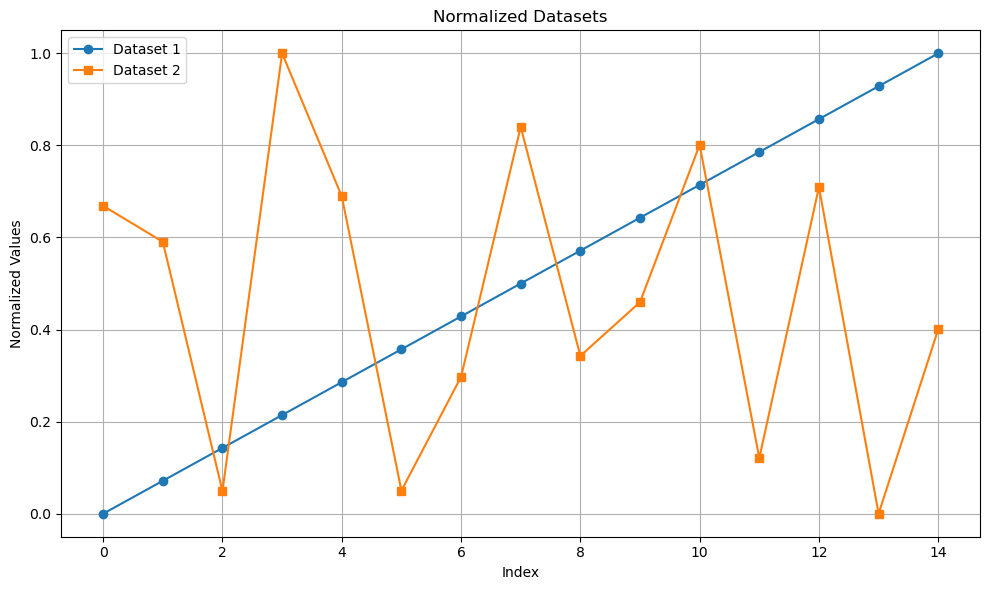

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Example datasets
dataset1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
dataset2 = np.random.randint(1, 11001, size=15)  # Example dataset with values ranging from 1 to 11000

# Min-Max normalization
def min_max_normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

normalized_dataset1 = min_max_normalization(dataset1)
normalized_dataset2 = min_max_normalization(dataset2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(normalized_dataset1, label='Dataset 1', marker='o')
plt.plot(normalized_dataset2, label='Dataset 2', marker='s')

#plt.plot(dataset1, label='Dataset 1', marker='o')
#plt.plot(dataset2, label='Dataset 2', marker='s')

plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.title('Normalized Datasets')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()